<a href="https://colab.research.google.com/github/giorgosstath16/AIDL_01/blob/main/Giorgos_Stathakopoulos_ML_classification_(mscaidl_0033).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# NASA Nearest Eearth Objects Danger Estimation

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

In [2]:
#load the dataset from kaggle
from google.colab import drive
drive.mount('/content/drive')

import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/drive/MyDrive/Kaggle"

%cd /content/drive/MyDrive/Kaggle

!kaggle datasets download -d sameepvani/nasa-nearest-earth-objects

Mounted at /content/drive
/content/drive/MyDrive/Kaggle
  0% 0.00/6.60M [00:00<?, ?B/s]
100% 6.60M/6.60M [00:00<00:00, 104MB/s]


In [ ]:
#unzip the file
!unzip \nasa-nearest-earth-objects.zip  -d \nasa-nearest-earth-objects && rm *.zip  

Archive:  nasa-nearest-earth-objects.zip
replace nasa-nearest-earth-objects/neo.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [3]:
# read csv files
df1 = pd.read_csv("/content/drive/MyDrive/Kaggle/nasa-nearest-earth-objects/neo.csv")
df2 = pd.read_csv("/content/drive/MyDrive/Kaggle/nasa-nearest-earth-objects/neo_v2.csv")

Explore each dataset features

In [4]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90836 entries, 0 to 90835
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  90836 non-null  int64  
 1   name                90836 non-null  object 
 2   est_diameter_min    90836 non-null  float64
 3   est_diameter_max    90836 non-null  float64
 4   relative_velocity   90836 non-null  float64
 5   miss_distance       90836 non-null  float64
 6   orbiting_body       90836 non-null  object 
 7   sentry_object       90836 non-null  bool   
 8   absolute_magnitude  90836 non-null  float64
 9   hazardous           90836 non-null  bool   
dtypes: bool(2), float64(5), int64(1), object(2)
memory usage: 5.7+ MB


In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90836 entries, 0 to 90835
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  90836 non-null  int64  
 1   name                90836 non-null  object 
 2   est_diameter_min    90836 non-null  float64
 3   est_diameter_max    90836 non-null  float64
 4   relative_velocity   90836 non-null  float64
 5   miss_distance       90836 non-null  float64
 6   orbiting_body       90836 non-null  object 
 7   sentry_object       90836 non-null  bool   
 8   absolute_magnitude  90836 non-null  float64
 9   hazardous           90836 non-null  bool   
dtypes: bool(2), float64(5), int64(1), object(2)
memory usage: 5.7+ MB


Merge the 2 datasets in one

In [5]:
# merge ds
df = pd.concat([df1,df2])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 181672 entries, 0 to 90835
Data columns (total 10 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  181672 non-null  int64  
 1   name                181672 non-null  object 
 2   est_diameter_min    181672 non-null  float64
 3   est_diameter_max    181672 non-null  float64
 4   relative_velocity   181672 non-null  float64
 5   miss_distance       181672 non-null  float64
 6   orbiting_body       181672 non-null  object 
 7   sentry_object       181672 non-null  bool   
 8   absolute_magnitude  181672 non-null  float64
 9   hazardous           181672 non-null  bool   
dtypes: bool(2), float64(5), int64(1), object(2)
memory usage: 12.8+ MB


In [6]:
df.head()

,id,name,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,orbiting_body,sentry_object,absolute_magnitude,hazardous
0,2162635,162635 (2000 SS164),1.198271,2.679415,13569.249224,5.483974e+07,Earth,False,16.73,False
1,2277475,277475 (2005 WK4),0.265800,0.594347,73588.726663,6.143813e+07,Earth,False,20.00,True
2,2512244,512244 (2015 YE18),0.722030,1.614507,114258.692129,4.979872e+07,Earth,False,17.83,False
3,3596030,(2012 BV13),0.096506,0.215794,24764.303138,2.543497e+07,Earth,False,22.20,False
4,3667127,(2014 GE35),0.255009,0.570217,42737.733765,4.627557e+07,Earth,False,20.09,True


Text(0.5, 1.0, 'Distance vs Luminosity graph')

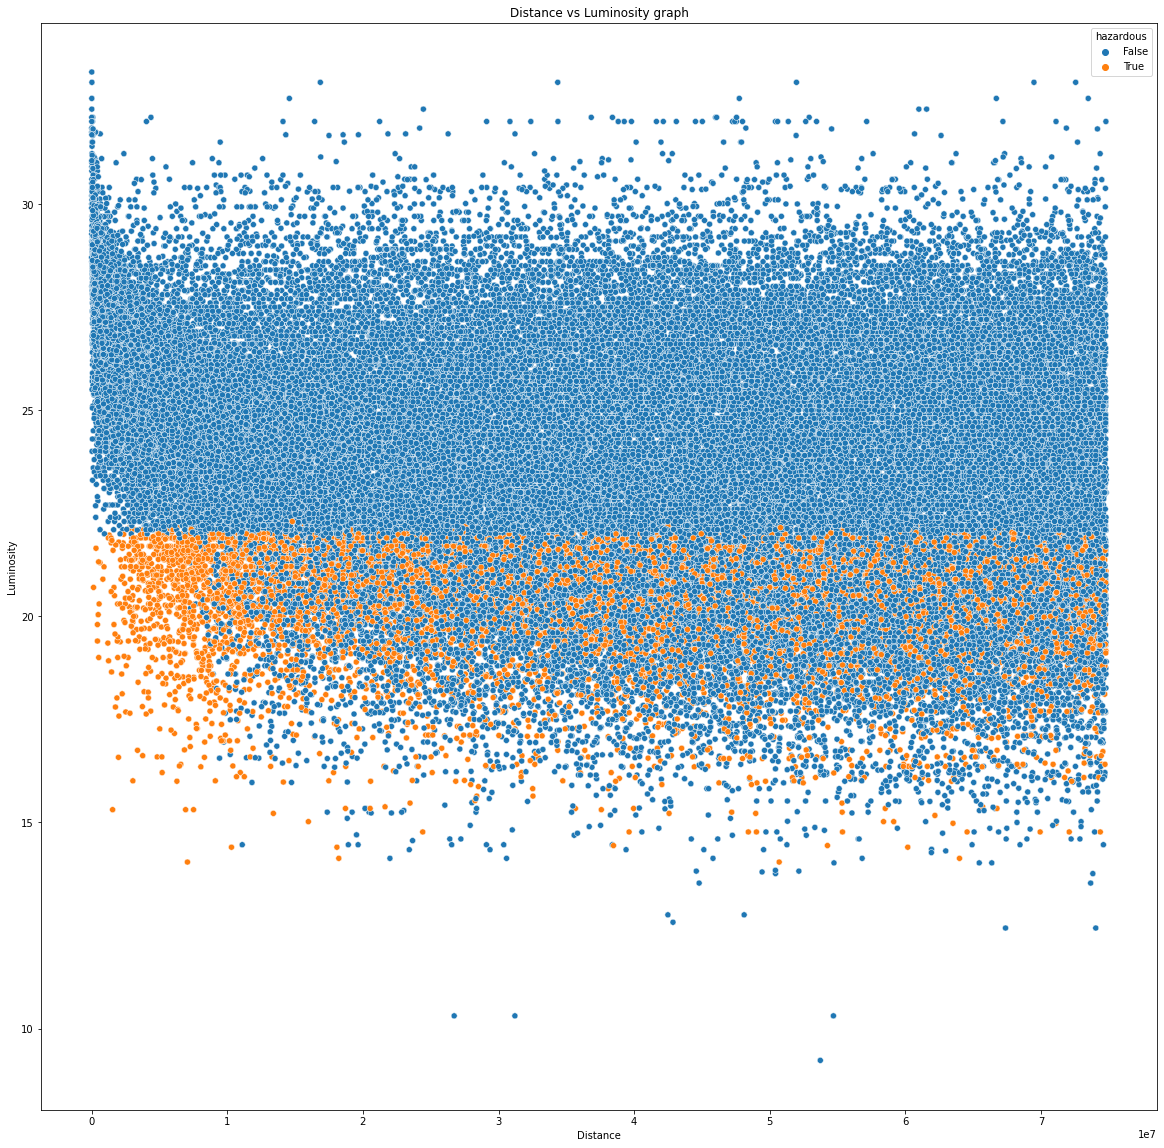

In [36]:
plt.figure(figsize=(20,20))
sns.scatterplot(x='miss_distance',y='absolute_magnitude',data=df, hue ='hazardous',palette='tab10') 
plt.xlabel('Distance')
plt.ylabel('Luminosity')
plt.title('Distance vs Luminosity graph')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f84c66e5a90>,
      dtype=object)

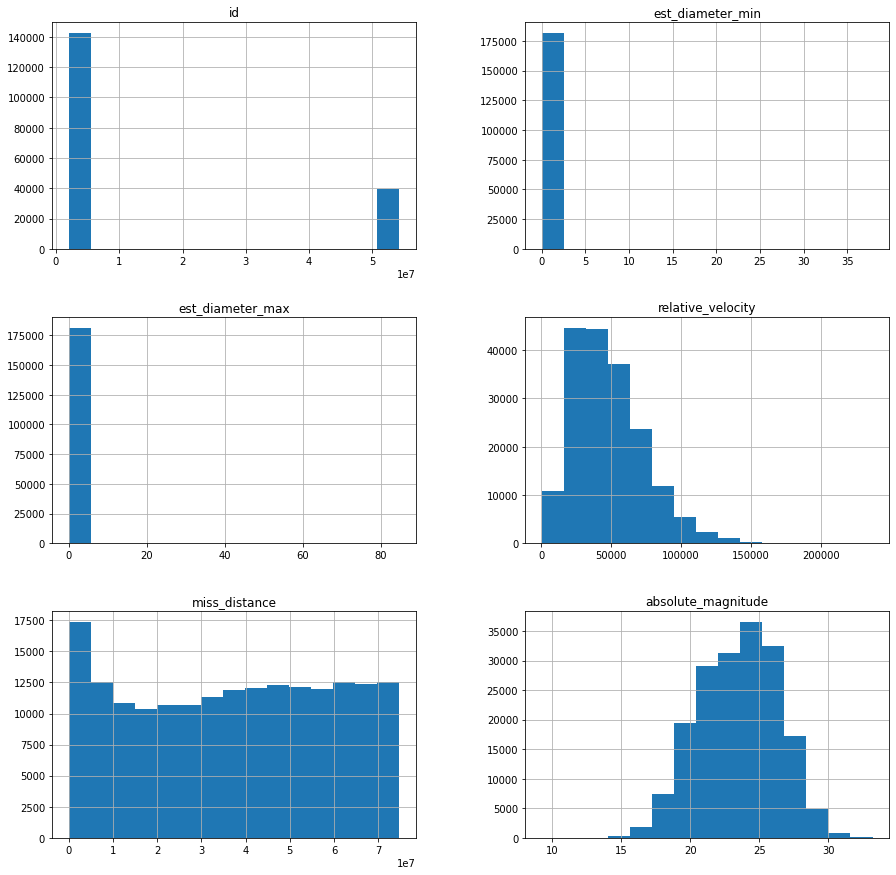

In [29]:
df.hist(bins=15, figsize=(15, 15))

Explore if object and boolean values have more than one value

In [7]:
df.orbiting_body.value_counts()

Earth    181672
Name: orbiting_body, dtype: int64

In [ ]:
df.sentry_object.value_counts()

False    181672
Name: sentry_object, dtype: int64

 As it turns out, every Nearest Earth Object of the dataset has Earth as its orbiting body and it is not logged in Sentry Monitoring System (A NASA automated collision monitoring system). So 2 columns are off the learning process.

In [8]:
X = df[['est_diameter_min', 'est_diameter_max', 'relative_velocity', 'miss_distance','absolute_magnitude']]
y= df['hazardous']
print('X shape is:', X.shape)
print('y shape is:', y.shape)

X shape is: (181672, 5)
y shape is: (181672,)


In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=4)

model = DecisionTreeClassifier()
model.fit(X_train, y_train)

result = model.score(X_test, y_test)
print(result)

0.9694323144104804


In [11]:
from sklearn import tree

In [12]:
dtree = tree.DecisionTreeClassifier(criterion='entropy')
dtree.fit(X_train, y_train)
y_pred = dtree.predict(X_test)
from sklearn.metrics import accuracy_score
print("Accuracy Score:")
accuracy_score(y_test, y_pred)

Accuracy Score:


0.9697258816190232

In [13]:
dtree = tree.DecisionTreeClassifier(criterion='gini')
dtree.fit(X_train, y_train)
y_pred = dtree.predict(X_test)
from sklearn.metrics import accuracy_score
print("Accuracy Score:")
accuracy_score(y_test, y_pred)

Accuracy Score:


0.9696157939158196